# Comparing Recall, Precision and F1 score: All models

In [1]:
from queries import*
from utilities import*
import os

In [2]:
directory = str(pathlib.Path().absolute()) + '/data/output/metrics'
output_directory = os.listdir(directory)

In [3]:
output_directory[7]

'SAGE.csv'

In [4]:
plt.rcParams['font.size'] = '16'

In [5]:
GCN = pd.read_csv(directory + '/'+output_directory[0])
nodes_hinge = pd.read_csv(directory + '/'+output_directory[1])
nodes_logi = pd.read_csv(directory + '/'+output_directory[2])
nodes_forest = pd.read_csv(directory + '/'+output_directory[3])
nodes_poly = pd.read_csv(directory + '/'+output_directory[4])
nodes_rbf = pd.read_csv(directory + '/'+output_directory[5])
GAT = pd.read_csv(directory + '/'+output_directory[6])
SAGE = pd.read_csv(directory + '/'+output_directory[7])
laplace_hinge = pd.read_csv(directory + '/'+output_directory[8])
laplace_poly = pd.read_csv(directory + '/'+output_directory[9])
laplace_rbf = pd.read_csv(directory + '/'+output_directory[10])
lapalce_logi = pd.read_csv(directory + '/'+output_directory[11])
laplace_forest = pd.read_csv(directory + '/'+output_directory[12])

In [6]:
GCN.head()

,train accuracy,test accuracy,recall_1,precision_1,recall_0,precision_0
0,0.795455,0.684211,0.00,0.000000,0.866667,0.764706
1,0.886364,0.736842,0.00,0.000000,0.933333,0.777778
2,0.795455,0.736842,0.25,0.333333,0.866667,0.812500
3,0.818182,0.842105,0.50,0.666667,0.933333,0.875000
4,0.727273,0.421053,0.25,0.111111,0.466667,0.700000


In [7]:
GCN['f1'] = GCN.apply(lambda x: 2*x.recall_1 *x.precision_1 / (x.recall_1+x.precision_1), axis =1)
GAT['f1'] = GAT.apply(lambda x: 2*x.recall_1 *x.precision_1 / (x.recall_1+x.precision_1), axis =1)
SAGE['f1'] = SAGE.apply(lambda x: 2*x.recall_1 *x.precision_1 / (x.recall_1+x.precision_1),axis=1)


invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars


In [8]:
GCN = GCN.fillna(0)
GAT = GAT.fillna(0)
SAGE = SAGE.fillna(0)

In [9]:
test_accuracy = pd.DataFrame({} ,columns =['GCN','GAT','GraphSAGE','Cell-level hinge','Cell-level logistic','Cell-level forest','Cell-level polynomial','Cell-level rbf', 'Cluster-level hinge','Cluster-level logistic','Cluster-level forest','Cluster-level polynomial','Cluster-level rbf'])

test_accuracy['GCN'] = GCN['test accuracy'].values
test_accuracy['GAT'] = GAT['test accuracy'].values
test_accuracy['GraphSAGE'] = SAGE['test accuracy'].values

test_accuracy['Cell-level hinge'] = nodes_hinge['test accuracy'].values
test_accuracy['Cell-level logistic'] = nodes_logi['test accuracy'].values
test_accuracy['Cell-level forest'] = nodes_forest['test accuracy'].values
test_accuracy['Cell-level polynomial'] = nodes_poly['test accuracy'].values
test_accuracy['Cell-level rbf'] = nodes_rbf['test accuracy'].values


test_accuracy['Cluster-level hinge'] = laplace_hinge['test accuracy'].values
test_accuracy['Cluster-level logistic'] = lapalce_logi['test accuracy'].values
test_accuracy['Cluster-level forest'] = laplace_forest['test accuracy'].values
test_accuracy['Cluster-level polynomial'] = laplace_poly['test accuracy'].values
test_accuracy['Cluster-level rbf'] = laplace_rbf['test accuracy'].values

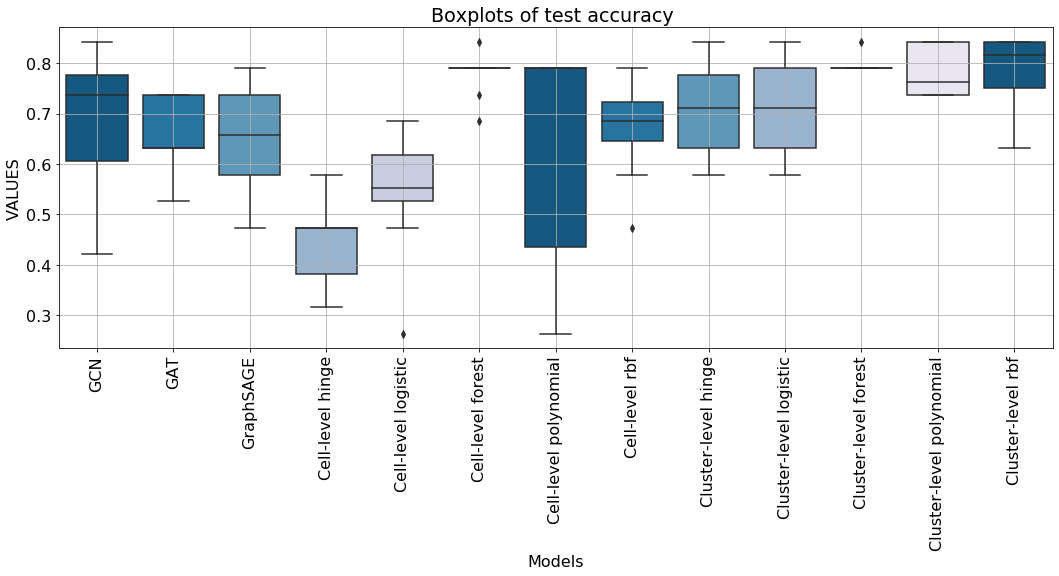

In [22]:
plt.figure(figsize=(15,8))
n = len(test_accuracy)
A = sns.color_palette("PuBu_r")
sns.boxplot(data=test_accuracy, palette =A)
plt.xlabel('Models')
plt.xticks(rotation=90) 
plt.ylabel('VALUES')
plt.grid()
plt.tight_layout()

plt.title( 'Boxplots of test accuracy ' )
plt.savefig('./plots/test_accuracy_all models.png') 

In [23]:
recall = pd.DataFrame({} ,columns =['GCN','GAT','GraphSAGE','Cell-level hinge','Cell-level logistic','Cell-level forest','Cell-level polynomial','Cell-level rbf', 'Cluster-level hinge','Cluster-level logistic','Cluster-level forest','Cluster-level polynomial','Cluster-level rbf'])

recall['GCN'] = GCN['recall_1'].values
recall['GAT'] = GAT['recall_1'].values
recall['GraphSAGE'] = SAGE['recall_1'].values

recall['Cell-level hinge'] = nodes_hinge['recall'].values
recall['Cell-level logistic'] = nodes_logi['recall'].values
recall['Cell-level forest'] = nodes_forest['recall'].values
recall['Cell-level polynomial'] = nodes_poly['recall'].values
recall['Cell-level rbf'] = nodes_rbf['recall'].values


recall['Cluster-level hinge'] = laplace_hinge['recall'].values
recall['Cluster-level logistic'] = lapalce_logi['recall'].values
recall['Cluster-level forest'] = laplace_forest['recall'].values
recall['Cluster-level polynomial'] = laplace_poly['recall'].values
recall['Cluster-level rbf'] = laplace_rbf['recall'].values

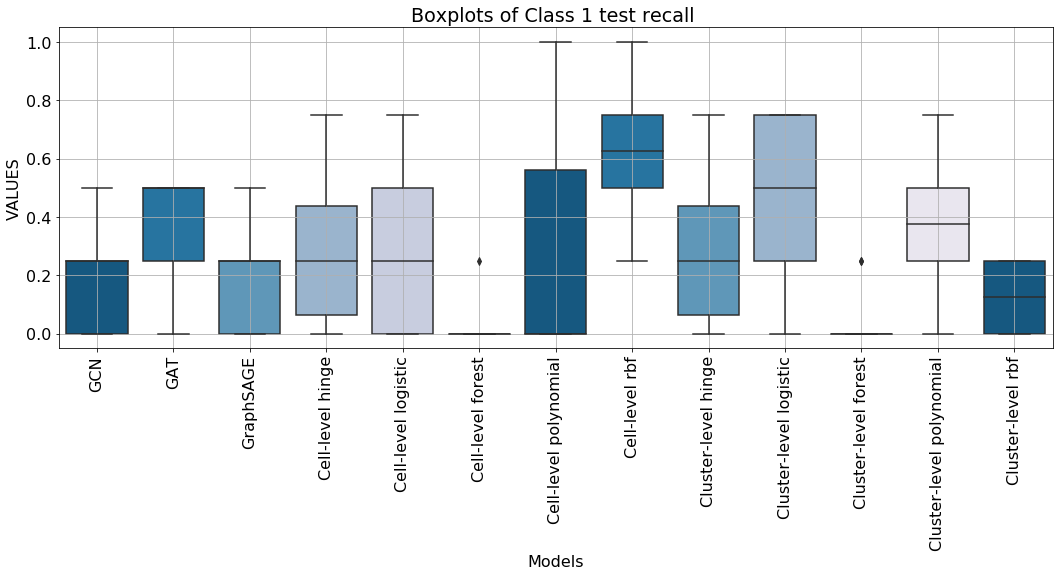

In [25]:
plt.figure(figsize=(15,8))
A = sns.color_palette("PuBu_r")

sns.boxplot(data=recall, palette =A)

plt.xlabel('Models')
plt.xticks(rotation=90) 
plt.ylabel('VALUES')
plt.tight_layout()

plt.grid()
plt.title( 'Boxplots of Class 1 test recall ' )
plt.savefig('./plots/recall_all models.png') 

In [27]:
f1 = pd.DataFrame({} ,columns =['GCN','GAT','GraphSAGE','Cell-level hinge','Cell-level logistic','Cell-level forest','Cell-level polynomial','Cell-level rbf', 'Cluster-level hinge','Cluster-level logistic','Cluster-level forest','Cluster-level polynomial','Cluster-level rbf'])

f1['GCN'] = GCN['f1'].values
f1['GAT'] = GAT['f1'].values
f1['GraphSAGE'] = SAGE['f1'].values

f1['Cell-level hinge'] = nodes_hinge['f1'].values
f1['Cell-level logistic'] = nodes_logi['f1'].values
f1['Cell-level forest'] = nodes_forest['f1'].values
f1['Cell-level polynomial'] = nodes_poly['f1'].values
f1['Cell-level rbf'] = nodes_rbf['f1'].values


f1['Cluster-level hinge'] = laplace_hinge['f1'].values
f1['Cluster-level logistic'] = lapalce_logi['f1'].values
f1['Cluster-level forest'] = laplace_forest['f1'].values
f1['Cluster-level polynomial'] = laplace_poly['f1'].values
f1['Cluster-level rbf'] = laplace_rbf['f1'].values


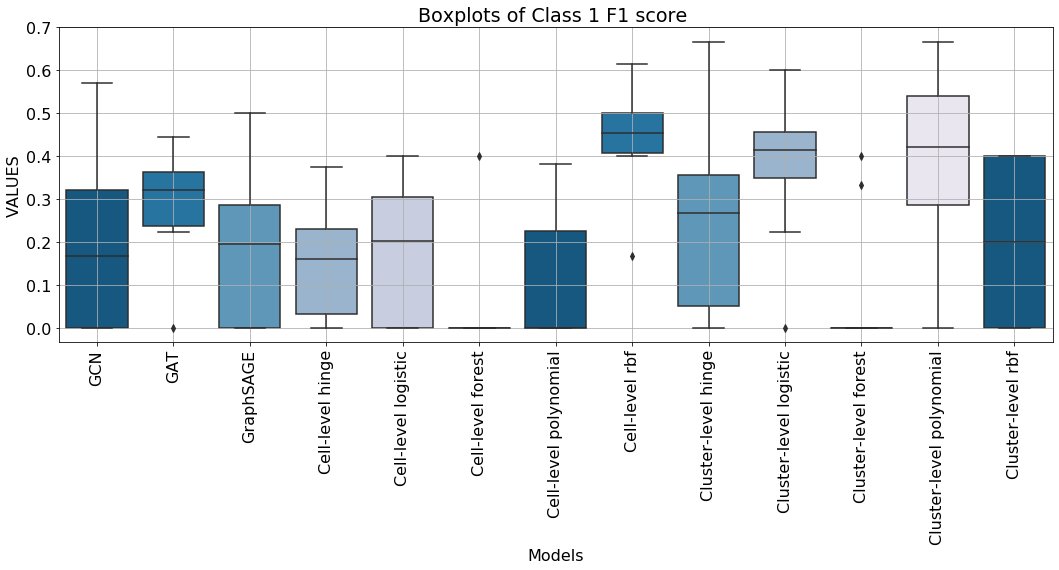

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(data=f1, palette =A)
plt.xlabel('Models')
plt.xticks(rotation=90) 
plt.ylabel('VALUES')
plt.tight_layout()

plt.grid()
plt.title( 'Boxplots of Class 1 F1 score ' )
plt.savefig('./plots/F1_score_all models.png') 